# Optimality

Trying to hash out some of the details from the paper about the socially optimal amount of enclosure. We start out with the case in which labor is allocated optimally, so the marginal product on the commons is equal to that in the enclosed sector, given the degree of enclosure:

$$
\alpha\left(\frac{1-t_e}{1-l_e}\right)^{1-\alpha}=\alpha\theta\left(\frac{t_e}{l_e}\right)^{1-\alpha}
$$

So, what I call $l_e^o$ in the paper is:

$$
l_e^o = \frac{\theta^\frac{1}{1-\alpha}t_e}{1-t_e+\theta^\frac{1}{1-\alpha}t_e}
$$

The Aggregate production function is:

$$
Y= \bar T^{1-\alpha} \bar L^\alpha\left(\theta t_e^{1-\alpha} l_e^\alpha+(1-t_e)^{1-\alpha}(1-l_e)^\alpha\right) - c \bar T t_e
$$

Which reduces to

$$
\bar T^{1-\alpha} \bar L^\alpha \left(1-t_e+\theta^\frac{1}{1-\alpha}t_e\right)^{1-\alpha}-c\bar T t_e
$$

# First best, unconditional optimality

Now, from the above, it is clear that $\theta<1$ is a non-starter. In this case, the above function is just decreasing in $t_e$. But it is also true that if $\theta>0$, then the function is everywhere concave. 

This is important because it shows that the cases in which the function is convex derive from misallocation on the commons. In any event, we can evaluate the derivatives of this function at zero and one to see if enclosure should be void, partial, or full. Let's write in intensive form as:

$$
\bar T\left[p^\alpha \left(1-t_e+\theta^\frac{1}{1-\alpha}t_e\right)^{1-\alpha}-c t_e\right]
$$

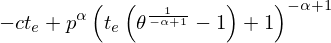

In [1]:
from sympy import *

init_printing()

p, theta, te, alpha, c = symbols('p theta t_e alpha c')
Yfb = p**alpha*((theta**(1/(1-alpha))-1 )*te + 1)**(1-alpha) - c*te
Yfb

The derivative is:

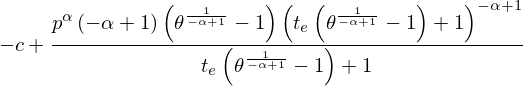

In [2]:
Yfbp = diff(Yfb, te)
Yfbp

So, what we will do to get the loci for the first-best case is 

- substitute in 0 and 1
- solve the result for $p$. 

We have:

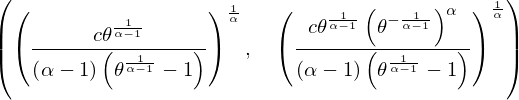

In [3]:
Yfbp0 = Yfbp.subs({te:0})
Yfbp1 = Yfbp.subs({te:1})
solve(Yfbp0, p)[0].simplify(), solve(Yfbp1, p)[0].simplify()

Rewrite the above as:

$$
p_0^o = \left[\frac{c}{(\theta^\frac{1}{1-\alpha}-1)(1-\alpha)}\right]^\frac{1}{\alpha}
$$

$$
p_1^o = \left[\frac{c\theta^\frac{\alpha}{1-\alpha}}{(\theta^\frac{1}{1-\alpha}-1)(1-\alpha)}\right]^\frac{1}{\alpha}
$$

A couple of things about this - first, it might make sense to first graph these up in a way that seems reasonable. So, we have:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

##### Base parameters  #####

c        = 1
alp      = 1/2

##### Truncated ranges applicable only at certain points ####

the_1 = np.arange(1.4, 2, .01)

po0 = ( c                      / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp)
po1 = ( c*the_1**(alp/(1-alp)) / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp)

fig, ax = plt.subplots(figsize=(10, 8))

oline1 = ax.plot(the_1, po0, color='blue')
bline1 = ax.plot(the_1, po1, color='orange')

gline1  = ax.axvline(1, color= 'green', linestyle=':')

So, we see that the two lines head asymptotically towards the value one...but it is hard to show this on the graph. Are things less sensitive with log-labor/land ratio?

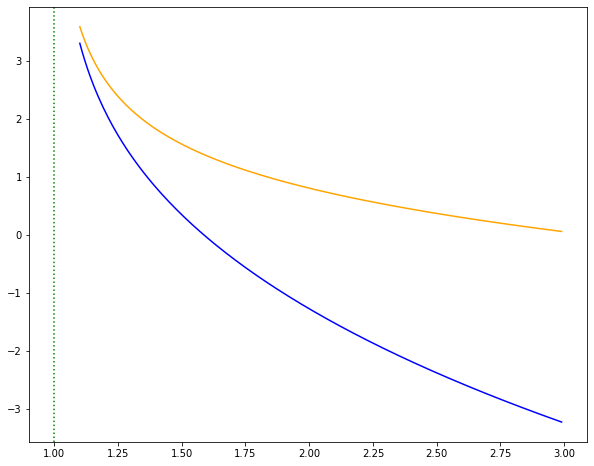

In [5]:
import numpy as np
import matplotlib.pyplot as plt

##### Base parameters  #####

c        = 1
alp      = 2/3

##### Truncated ranges applicable only at certain points ####

the_1 = np.arange(1.1, 3, .01)

ln_po0 = np.log(( c                      / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))
ln_po1 = np.log(( c*the_1**(alp/(1-alp)) / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))

fig, ax = plt.subplots(figsize=(10, 8))

oline1 = ax.plot(the_1, ln_po0, color='blue')
bline1 = ax.plot(the_1, ln_po1, color='orange')

gline1  = ax.axvline(1, color= 'green', linestyle=':')

So, over the blue line there should be some enclosure, while over the orange line, there should be total enclosure. technology/TFP parameter is on the horizontal axis, while the labor/land ratio (in logs) is on the vertical axis. 

# The shape of aggregate production with conditional optimality

Repeat the same steps but using the labor allocation condition: 

$$
\left(\frac{1-t_e}{1-l_e}\right)^{1-\alpha}=\alpha\theta\left(\frac{t_e}{l_e}\right)^{1-\alpha}
$$

Out of this, we have:

$$
l_e^* = \frac{(\alpha\theta)^\frac{1}{1-\alpha}t_e}{1-t_e+(\alpha\theta)^\frac{1}{1-\alpha}t_e}
$$

In the aggregate production function, we now have:

$$
Y=\bar T^{1-\alpha} \bar L^\alpha \left(\frac{1-t_e+\frac{\Lambda}{\alpha}t_e}{(1-t_e+\Lambda t_e)^\alpha}\right) - ct_eT
$$

where $\Lambda = (\alpha\theta)^\frac{1}{1-\alpha}$. 

In intensive form, we can write this as:


$$
Y=T\left[p^\alpha \left(\frac{1-t_e+\frac{\Lambda}{\alpha}t_e}{(1-t_e+\Lambda t_e)^\alpha}\right) 
- ct_e\right]
$$


# Characteristics of the function

A couple of things are obvious about the above conditional optimum. First, note that the key thing about the function are $\Lambda$, and $\frac{\Lambda}{\alpha}$. First, the function is concave so long as $\Lambda>1$. in this case, $\Lambda>\alpha$ is also greater than one. So, the numerator is linear and the denominator is concave, resulting in a concave function. This requires that $\theta \geq \frac{1}{\alpha}$.

It is, however, also possible that $\Lambda>\alpha$, and $\Lambda<1$. In this case, the numerator is linear and increasing, while the denominator is decreasing, so we have a convex function! So, here, we just check the corner solutions and see if output is higher when there is total enclosure...

What about the case in which both the numerator and the denominator are negative? It can be shown that in this case, it is never desirable to enclose. Anyways, let's write our (intensive) function as follows:

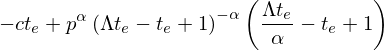

In [6]:
alpha, p, te, Lambda, theta, c = symbols('alpha p t_e Lambda theta c')

Y = p**alpha* (1-te+Lambda/alpha*te) /  (1-te+Lambda*te)**alpha - c*te
Y

The derivative of this expression is: 

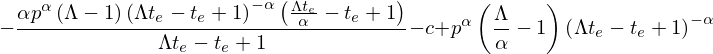

In [7]:
Yp = diff(Y, te)
Yp

The values at zero and one are:

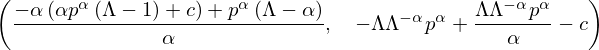

In [8]:
Yp0 = Yp.subs({te:0}).simplify()
Yp1 = Yp.subs({te:1}).simplify()
Yp0, Yp1

So, our "start enclosing" locus and our "finish enclosing" locus are (once again, applicable when the function is concave):

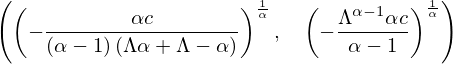

In [9]:
solve(Yp0, p)[0], solve(Yp1, p)[0]

Now, if the circumstances (2) on the list hold, then we just look at endpoints. We form:

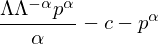

In [10]:
dY = Y.subs({te:1}) - Y.subs({te:0})
dY

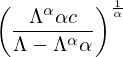

In [11]:
solve(dY, p)[0]

Rewriting these conditions:

$$
p^*_0 = \left[\frac{\alpha c}{(1-\alpha)(\Lambda(1+\alpha)-\alpha)}\right]^\frac{1}{\alpha}
$$

$$
p^*_1 = \left[\frac{\alpha c}{(1-\alpha)\Lambda^{1-\alpha}}\right]^\frac{1}{\alpha}
$$

Rewriting without $\Lambda$:

$$
p^*_0 = \left[\frac{\alpha c}{(1-\alpha)((\alpha\theta)^\frac{1}{1-\alpha}(1+\alpha)-\alpha)}\right]^\frac{1}{\alpha}
$$

$$
p^*_1 = \left[\frac{c}{(1-\alpha)\theta}\right]^\frac{1}{\alpha}
$$

The flipping point when there is convexity is given by:

$$
p^*=\left[\frac{c}{\theta-1}\right]^\frac{1}{\alpha}
$$

Let's add these lines into the above and see where it gets us. It is a total of three lines...

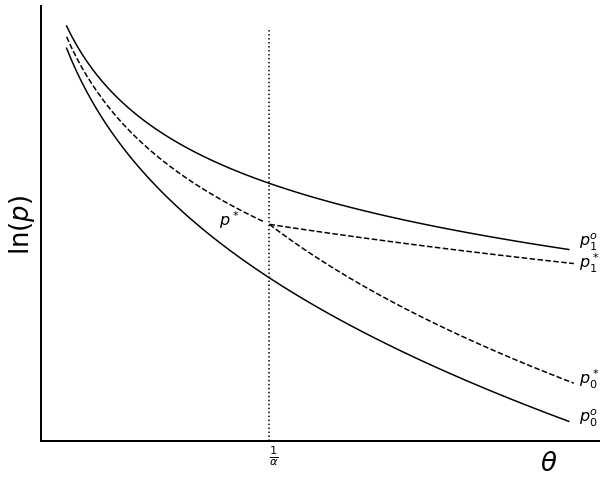

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D

##### Base parameters  #####

c        = 1
alp      = 2/3

##### Truncated ranges applicable only at certain points ####

start  = 1.1
finish = 2.1
the_1 = np.arange(start, finish, .01)

ln_po0 = np.log(( c                      / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))
ln_po1 = np.log(( c*the_1**(alp/(1-alp)) / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))

##### For these lines, we need separate plot ranges, so which run to the critical value

cv = 1 / alp

the_r1 = np.arange(start, cv, .01)
the_r2 = np.arange(cv, finish, .01)

ln_ps0 = np.log(( alp*c                  / (((the_r2*alp)**(1/(1-alp))*(1+alp) - alp)*(1-alp))  ) **(1/alp))
ln_ps1 = np.log(( c                      / (the_r2*(1-alp)  ) ) **(1/alp))
ln_ps  = np.log(( c/(the_r1 - 1))**(1/alp))

fig, ax = plt.subplots(figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

xlbl = ax.set_xlabel(r'$\theta$', fontsize=26)
ylbl = ax.set_ylabel(r'$\ln(p)$', fontsize=26)

# Shift the label on the x-axis a little bit

xpos = list(xlbl.get_position())
xpos[0] = xpos[0]+.41
xpos[1] = xpos[1]-.02
ax.xaxis.set_label_coords(xpos[0], xpos[1])

ax.set_xticks([])
ax.set_yticks([])

oline1 = ax.plot(the_1, ln_po0, color= 'black')
bline1 = ax.plot(the_1, ln_po1, color= 'black')
gline1 = ax.plot(the_r2, ln_ps0, color= 'black', linestyle='dashed')
pline1 = ax.plot(the_r2, ln_ps1, color= 'black', linestyle='dashed')
bkline = ax.plot(the_r1, ln_ps,  color='black', linestyle='dashed')

vline1 = ax.axvline(1/alp, ymax=.95, linestyle=':', color='black')

ep = np.max(the_1)+.021

t1 = ax.text(ep, np.min(ln_po0), r'$p^o_0$', fontsize=16)
t2 = ax.text(ep, np.min(ln_po1)+.05, r'$p^o_1$', fontsize=16)
t3 = ax.text(ep, np.min(ln_ps0), r'$p^*_0$', fontsize=16)
t4 = ax.text(ep, np.min(ln_ps1)-.05, r'$p^*_1$', fontsize=16)

t5 = ax.text(cv-.1, np.min(ln_ps)-.04, r'$p^*$', fontsize=16)

ax.text(cv, np.min(ln_po0)-.5, r'$\frac{1}{\alpha}$', fontsize=16)

fig.savefig('social_optimum.png')

# Decentralized Equilbria

We have found the key loci (as described in the paper) are as follows:

$$
p_0^d = \left[\frac{\alpha c}{(1-\alpha)\Lambda}\right]^\frac{1}{\alpha}
$$

$$
p_1^d = \left[\frac{ c}{\theta(1-\alpha)}\right]^\frac{1}{\alpha}
$$

and

$$
p_{gg}^d = \left[\frac{ \alpha c}{1-\alpha \theta}\frac{1-\Lambda}{\Lambda}\right]^\frac{1}{\alpha}
$$

As we will ultimately superimpose our two diagrams, let's try drawing these in the same scale as the above...

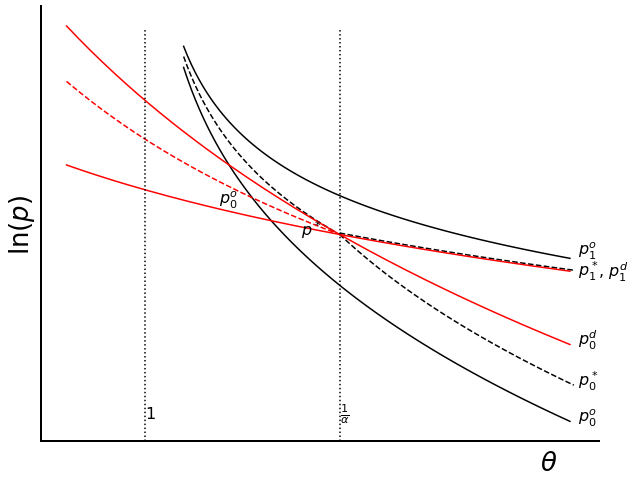

In [14]:
full_diag = True

the_1 = np.arange(start, finish, .01)
the_d = np.arange(.8, finish, .01)
the_gg = np.arange(.8, cv, .01 )

ln_po0 = np.log(( c                      / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))
ln_po1 = np.log(( c*the_1**(alp/(1-alp)) / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))

##### For these lines, we need separate plot ranges, so which run to the critical value

the_r1 = np.arange(start, cv, .01)
the_r2 = np.arange(cv, finish, .01)

ln_ps0 = np.log(( alp*c                  / (((the_r2*alp)**(1/(1-alp))*(1+alp) - alp)*(1-alp))  ) **(1/alp))
ln_ps1 = np.log(( c                      / (the_r2*(1-alp)  ) ) **(1/alp))
ln_ps  = np.log(( c/(the_r1 - 1))**(1/alp))

ln_pd0  = np.log( ( alp*c / ((1-alp)*(alp*the_d)**(1/(1-alp)))  ) **(1/alp) )
ln_pd1  = np.log( ( c / (the_d*(1-alp))) **(1/alp)  )
Lamgg = (alp*the_gg)**(1/(1-alp))
ln_pdgg = np.log( ( alp*c / (1-alp*the_gg) *  (1-Lamgg)/Lamgg )**(1/alp) )               

fig, ax = plt.subplots(figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

xlbl = ax.set_xlabel(r'$\theta$', fontsize=26)
ylbl = ax.set_ylabel(r'$\ln(p)$', fontsize=26)

# Shift the label on the x-axis a little bit

xpos = list(xlbl.get_position())
xpos[0] = xpos[0]+.41
xpos[1] = xpos[1]-.02
ax.xaxis.set_label_coords(xpos[0], xpos[1])

ax.set_xticks([])
ax.set_yticks([])

ep = np.max(the_1)+.021


if full_diag:
    oline1 = ax.plot(the_1, ln_po0, color= 'black')
    bline1 = ax.plot(the_1, ln_po1, color= 'black')
    gline1 = ax.plot(the_r2, ln_ps0, color= 'black', linestyle='dashed')
    pline1 = ax.plot(the_r2, ln_ps1+.02, color= 'black', linestyle='dashed')
    bkline = ax.plot(the_r1, ln_ps,  color='black', linestyle='dashed')

    t1 = ax.text(ep, np.min(ln_po0), r'$p^o_0$', fontsize=16)
    t2 = ax.text(ep, np.min(ln_po1)+.05, r'$p^o_1$', fontsize=16)
    t3 = ax.text(ep, np.min(ln_ps0), r'$p^*_0$', fontsize=16)
    t4 = ax.text(ep, np.min(ln_ps1)-.05, r'$p^*_1$', fontsize=16)
    t5 = ax.text(cv-.1, np.min(ln_ps)-.04, r'$p^*$', fontsize=16)

bbline1 = ax.plot(the_d, ln_pd0, color='red')
bbline2 = ax.plot(the_d, ln_pd1, color='red')
bbline3 = ax.plot(the_gg, ln_pdgg, color='red', linestyle='dashed')

vline1 = ax.axvline(1/alp, ymax=.95, linestyle=':', color='black')
vline2 = ax.axvline(1, ymax=.95, linestyle=':', color='black')

d1  = ax.text(ep, np.min(ln_pd0), r'$p^d_0$', fontsize=16)
dgg = ax.text(np.max(the_gg)-.3, np.min(ln_pdgg)+.4, r'$p^o_0$', fontsize=16)

if full_diag:
    d2  = ax.text(ep+.05, np.min(ln_pd1)-.07, r', $p^d_1$', fontsize=16)
else:
    d2  = ax.text(ep, np.min(ln_pd1), r'$p^d_1$', fontsize=16)

if full_diag:
    text1 = ax.text(cv, np.min(ln_pd0)-1, r'$\frac{1}{\alpha}$', fontsize=16)
    text2 = ax.text(1, np.min(ln_pd0)-1, r'$1$', fontsize=16)
else:
    text1 = ax.text(cv, np.min(ln_pd0)-.5, r'$\frac{1}{\alpha}$', fontsize=16)
    text2 = ax.text(1, np.min(ln_pd0)-.5, r'$1$', fontsize=16)    

if full_diag:
    fig.savefig('nash_so_comp.png')
else:
    fig.savefig('nash_eq.png')